In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

import rbm_qst
import rbm_classic

import utils
import utils_phases
import paper_functions

# Research

## RBM QST

In [56]:
num_units = 3
num_samples = 2000

thetas = utils_phases.random_phases(num_units)
print("Thetas:", thetas)

quantum_system = [(0,0,1),
                  (0,1,0),
                  (1,0,0)]

amplitudes = [1 / np.sqrt(3)] * 3
phases = thetas

main_basis = utils_phases.U_ZZ(num_units)

dataset = utils.generate_phases_dataset(quantum_system, amplitudes, phases, num_units, num_samples)
print(dataset.keys())

Thetas: [1.09794808 0.99844631 0.16185263]
dict_keys(['III', 'HHI', 'IHH', 'HKI', 'IHK'])


In [57]:
occurs, data_hist = utils.dataset_to_hist(dataset[main_basis])      
occurs

array([649, 662, 689])

In [58]:
data_hist

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [62]:
r_qst = rbm_qst.RBM_QST(num_units, 3, data_hist)
r_qst.train(dataset[main_basis], max_epochs=2000, learning_rate=0.4, debug=True, precise=True)

Epoch 0: objective is 2.0792484814974386
Epoch 100: objective is 1.9165935467527715
Epoch 200: objective is 1.9109466642780473
Epoch 300: objective is 1.8760223594577037
Epoch 400: objective is 1.817988326541904
Epoch 500: objective is 1.7077296145854932
Epoch 600: objective is 1.4968010616938863
Epoch 700: objective is 1.347237767391764
Epoch 800: objective is 1.2706640047495943
Epoch 900: objective is 1.227459113514328
Epoch 1000: objective is 1.2005001677392715
Epoch 1100: objective is 1.1823678026637046
Epoch 1200: objective is 1.1694597161967615
Epoch 1300: objective is 1.1598589522302267
Epoch 1400: objective is 1.1524671578040315
Epoch 1500: objective is 1.146615965387282
Epoch 1600: objective is 1.1418780043533754
Epoch 1700: objective is 1.1379685014691272
Epoch 1800: objective is 1.1346910023368004
Epoch 1900: objective is 1.1319059210136457


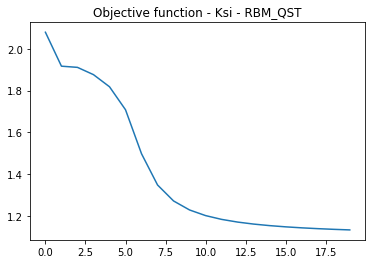

In [63]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [64]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)), num_samples=2000)
fid

0.9659510583080707

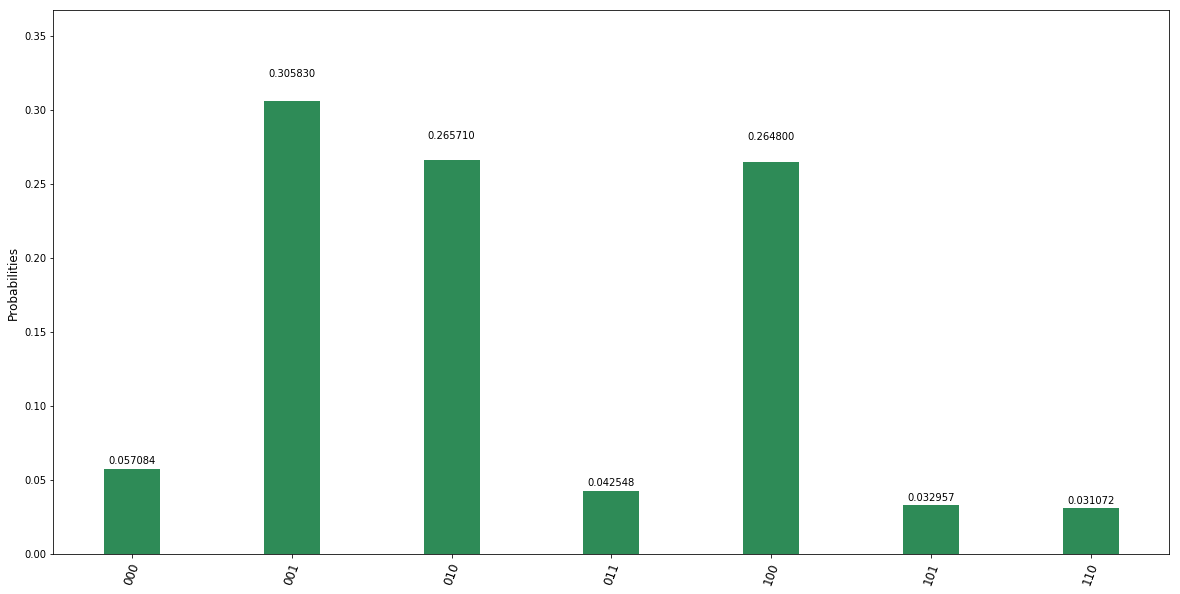

In [65]:
utils.plot_histogram(states)

## Classical RBM

In [81]:
r_cl = rbm_classic.RBM(num_units, 3)

In [82]:
r_cl.train(dataset["HKI"], max_epochs=3000, learning_rate=0.5, debug=True)

Epoch 0: objective is 2.089235221956695
Epoch 100: objective is 1.9282714474847888
Epoch 200: objective is 1.880321053809958
Epoch 300: objective is 1.8590352591004402
Epoch 400: objective is 1.8543552339022467
Epoch 500: objective is 1.858505210183757
Epoch 600: objective is 1.8824382593912625
Epoch 700: objective is 1.9005059691984265
Epoch 800: objective is 1.9009042524892807
Epoch 900: objective is 1.8738001551263623
Epoch 1000: objective is 1.8566430737322874
Epoch 1100: objective is 1.8667577187508575
Epoch 1200: objective is 1.8922337211414104
Epoch 1300: objective is 1.928856763024546
Epoch 1400: objective is 1.9603492196362116
Epoch 1500: objective is 1.961918595710036
Epoch 1600: objective is 1.944586230598168
Epoch 1700: objective is 1.9350972854077664
Epoch 1800: objective is 1.9264164316605117
Epoch 1900: objective is 1.921769329139505
Epoch 2000: objective is 1.9163706052034473
Epoch 2100: objective is 1.9132528472812542
Epoch 2200: objective is 1.9106768686989328
Epoch 2

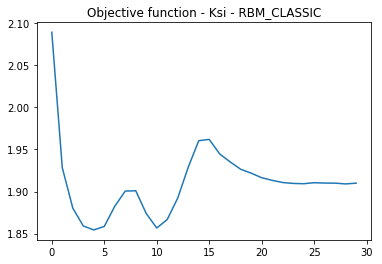

In [83]:
plt.plot(r_cl.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [84]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)), num_samples=2000)
fid

0.3634979844384922

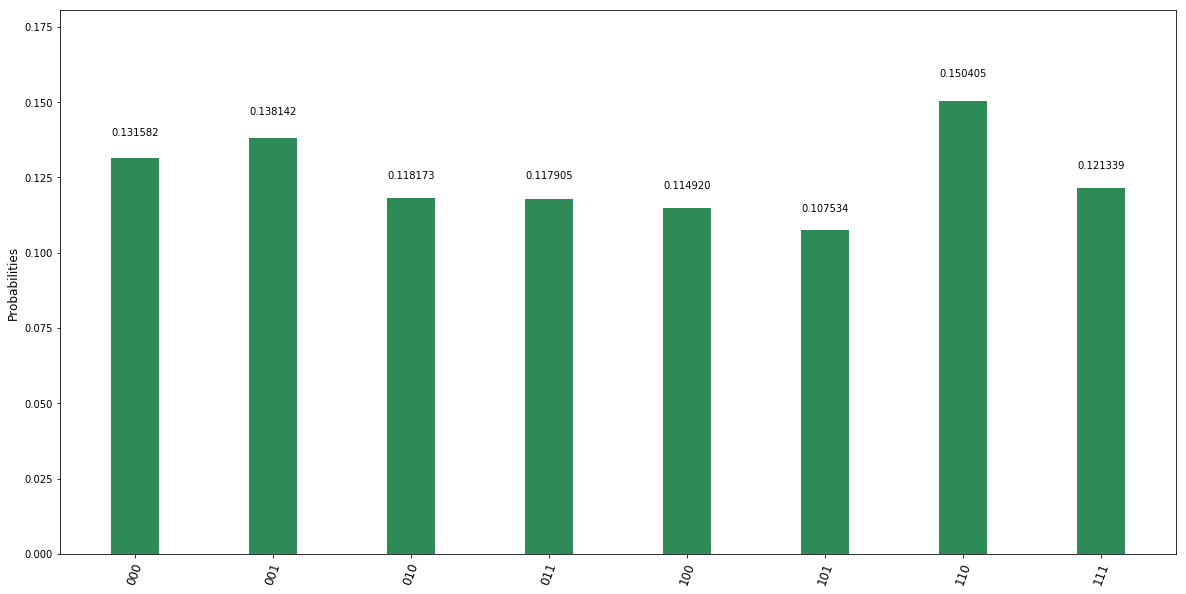

In [85]:
utils.plot_histogram(states)

# Plot Fig.1 b

In [19]:
import tqdm

num_units = 3
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:08<00:00,  2.27s/it]


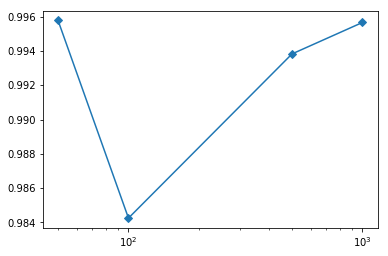

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()

In [48]:
import tqdm

num_units = 5
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_qst = rbm_qst.RBM_QST(num_units, num_units)
    r_qst.train(dataset, dataset, max_epochs=3000, learning_rate=0.5)

    fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)))
    fidelities.append(fid)
    print(fidelities[-1])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))


 25%|██▌       | 1/4 [00:12<00:37, 12.63s/it]

0.298996136808


 50%|█████     | 2/4 [00:24<00:25, 12.55s/it]

0.913126897567


 75%|███████▌  | 3/4 [00:36<00:12, 12.32s/it]

0.96150806699


100%|██████████| 4/4 [00:49<00:00, 12.35s/it]

0.948565339316


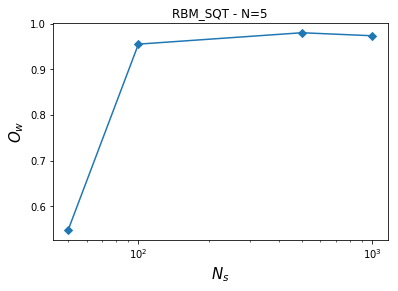

In [49]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.title('RBM_SQT - N={}'.format(num_units))
plt.xlabel('$N_s$', fontsize=15)
plt.ylabel('$O_w$', fontsize=15)
plt.show()